<a href="https://colab.research.google.com/github/PhanQuangTan/CS114.K21/blob/master/PredictTheTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import requests
file_url = 'https://cs.uit.edu.vn/data.txt'
r = requests.get(file_url, stream = True)
with open('/content/drive/My Drive/Dataset/data.txt', 'wb') as file:
  for block in r.iter_content(chunk_size = 1024):
    if block:
      file.write(block)

In [0]:
import numpy as np
import pandas as pd

In [0]:
def paretxt(fname):
  for line in open(fname, 'r'):
    yield eval(line)

In [0]:

file_name = '/content/drive/My Drive/Dataset/data.txt'
data = list(paretxt(file_name))

In [51]:
df = pd.DataFrame(data)
df.columns=['size', 'time']
print(df)


         size      time
0     4032139  1.200580
1     2055486  0.509774
2     5626651  1.476080
3       42065  0.007651
4     6297788  1.661560
...       ...       ...
5206  6600098  1.804520
5207  5339132  1.450310
5208  4794647  1.293070
5209  4440131  1.196530
5210  2033708  0.517288

[5211 rows x 2 columns]


In [0]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

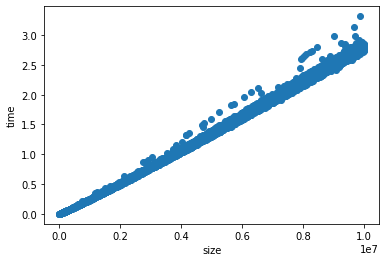

In [34]:
plt.scatter(df['size'], df['time'])
plt.xlabel('size')
plt.ylabel('time')
plt.show()

In [0]:
X = df['size']
y = df['time']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
print (X_train)
print (y_train)


1491    6854153
4511    1410435
2447    5206373
1965    9593800
2781    5432279
         ...   
4931    3389927
3264    3734210
1653    5287783
2607    3461325
2732    6094576
Name: size, Length: 4168, dtype: int64
1491    1.894740
4511    0.350044
2447    1.421660
1965    2.695990
2781    1.489570
          ...   
4931    0.904168
3264    0.980746
1653    1.463410
2607    0.905372
2732    1.647290
Name: time, Length: 4168, dtype: float64


In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [0]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [63]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred = regr.predict(X_test)

In [66]:
print('He So: \n', regr.coef_)

He So: 
 [2.84077497e-07]


In [0]:
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
print('Loi binh phuong: %.2f' % mean_squared_error(y_test, pred))

Loi binh phuong: 0.00


In [70]:
print('He so xac dinh: %.2f' % r2_score(y_test, pred))

He so xac dinh: 1.00


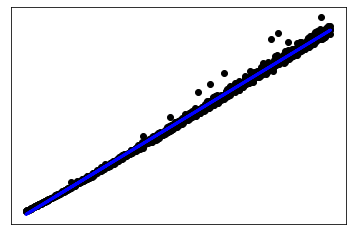

In [74]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()